# Target

即模型需要预测的输出变量，也叫标签（label）或响应变量。在回归中，target 是一个连续型数值，比如房价、温度、销售额等。

target 的分布情况会影响模型的训练效果和评估指标。 目标变量常见的分布类型包括：
<pre>
正态分布（或近似正态）
偏态分布（右偏或左偏）
多峰分布（存在多个集中区域）
离散分布（少见于回归，更多见于计数型目标）
</pre>

## 如何查看 Target 的分布？

1. 画图
<pre>
直方图（Histogram）
密度图（KDE）
Q-Q 图（判断正态性）
箱线图（查看异常值）
</pre>

2. 统计量
<pre>
均值、方差
偏度（skewness）
峰度（kurtosis）
</pre>

## 示例1:偏态分布
**个人理解就是正太分布向左或向右偏，如果是右偏分布多数值集中在左侧，小部分极端大值拉长右尾**

In [11]:
import pandas as pd
import warnings
warnings.filterwarnings(action="ignore")

data=pd.read_csv("train.csv",index_col="Id")
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


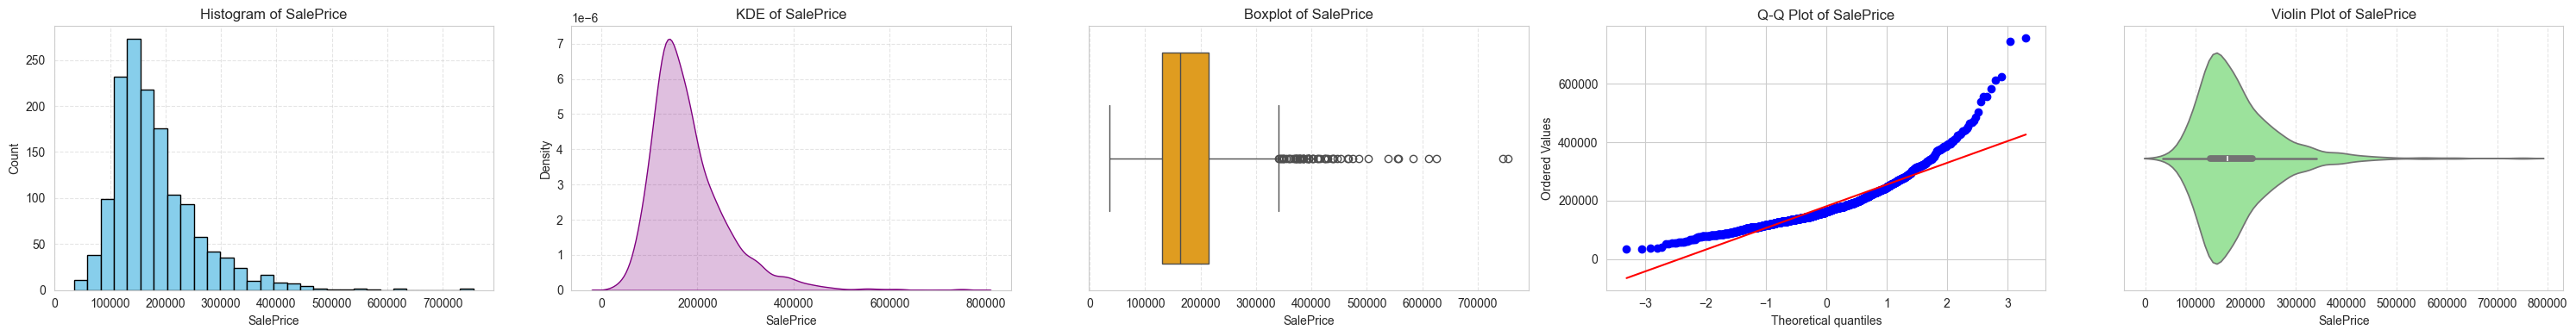

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

plt.figure(figsize=(30, 4))  # 调整图像宽度，适应5张子图

# 📊 1. 直方图
plt.subplot(1, 5, 1)
plt.hist(data['SalePrice'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.5)

# 📈 2. KDE 密度图
plt.subplot(1, 5, 2)
sns.kdeplot(data['SalePrice'], fill=True, color='purple')
plt.title('KDE of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Density')
plt.grid(True, linestyle='--', alpha=0.5)

# 📦 3. 箱线图
plt.subplot(1, 5, 3)
sns.boxplot(x=data['SalePrice'], color='orange')
plt.title('Boxplot of SalePrice')
plt.xlabel('SalePrice')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)

# 🔍 4. Q-Q 图
plt.subplot(1, 5, 4)
stats.probplot(data['SalePrice'], dist="norm", plot=plt)
plt.title('Q-Q Plot of SalePrice')

# 🎻 5. Violin Plot
plt.subplot(1, 5, 5)
sns.violinplot(x=data['SalePrice'], color='lightgreen')
plt.title('Violin Plot of SalePrice')
plt.xlabel('SalePrice')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


**从分布图上看很明显右边有很长的尾部，因此属于右峰分布，一般右峰分布需要对target数据做取对数变换（log）左峰分布需要对target数据做可使用平方、立方或指数变换拉伸左尾**

# 示列2:多峰分布
数据来源：https://www.kaggle.com/competitions/tabular-playground-series-feb-2021/data

In [13]:
data=pd.read_csv("/Users/yfan/Downloads/train2.csv",index_col="id")
data.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
id,,,,,,,,,,,,,,,,,,,,,
1,A,B,A,A,B,D,A,E,C,I,...,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903,6.994023
2,B,A,A,A,B,B,A,E,A,F,...,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464,8.071256
3,A,A,A,C,B,D,A,B,C,N,...,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352,5.760456
4,A,A,A,C,B,D,A,E,G,K,...,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766,7.806457
6,A,B,A,A,B,B,A,E,C,F,...,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743,6.868974


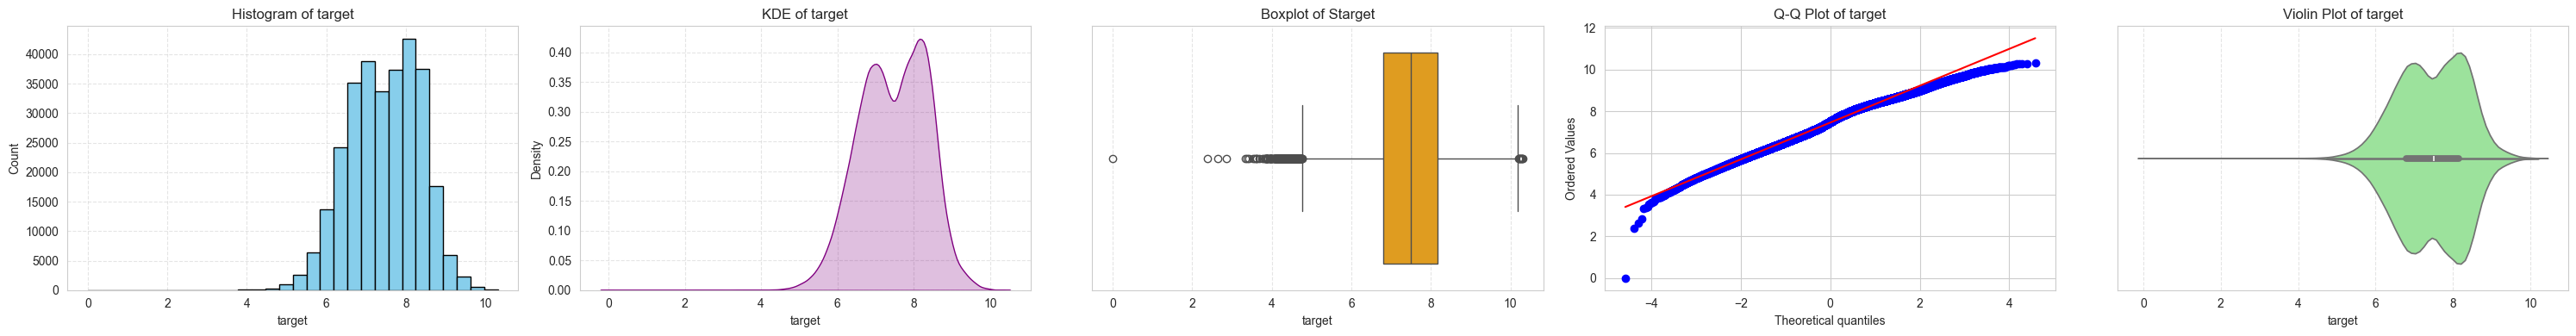

In [14]:
##Multimodal Distribution
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

plt.figure(figsize=(30, 4))  # 调整图像宽度，适应5张子图

# 📊 1. 直方图
plt.subplot(1, 5, 1)
plt.hist(data['target'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of target')
plt.xlabel('target')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.5)

# 📈 2. KDE 密度图
plt.subplot(1, 5, 2)
sns.kdeplot(data['target'], fill=True, color='purple')
plt.title('KDE of target')
plt.xlabel('target')
plt.ylabel('Density')
plt.grid(True, linestyle='--', alpha=0.5)

# 📦 3. 箱线图
plt.subplot(1, 5, 3)
sns.boxplot(x=data['target'], color='orange')
plt.title('Boxplot of Starget')
plt.xlabel('target')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)

# 🔍 4. Q-Q 图
plt.subplot(1, 5, 4)
stats.probplot(data['target'], dist="norm", plot=plt)
plt.title('Q-Q Plot of target')

# 🎻 5. Violin Plot
plt.subplot(1, 5, 5)
sns.violinplot(x=data['target'], color='lightgreen')
plt.title('Violin Plot of target')
plt.xlabel('target')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


**从分布图上就可以看到是一个典型的双峰分布，多峰分布可能存在不同类别的数据混合 → 可考虑分组建模（clustered regression）或尝试将分类特征加入模型解释多峰性**

# 示例3:负二项式分布
数据来源:https://www.kaggle.com/competitions/tabular-playground-series-aug-2022/data

离散分布（整数型）可以照常处理，也可考虑Poisson回归等计数回归方法某些模型可能更适合处理连续目标变量，建议适当平滑（如加入微小噪声）。负二项分布是一种离散、偏态的分布，高峰在左，右侧长尾巴

In [22]:
#Negative Binomial Distribution
#https://www.kaggle.com/competitions/tabular-playground-series-aug-2022/data
data=pd.read_csv("./train3.csv",index_col="id")
data.head()

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
id,,,,,,,,,,,,,,,,,,,,,
0,A,80.10,material_7,material_8,9,5,7,8,4,18.040,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,A,84.89,material_7,material_8,9,5,14,3,3,18.213,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,A,82.43,material_7,material_8,9,5,12,1,5,18.057,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,A,101.07,material_7,material_8,9,5,13,2,6,17.295,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,A,188.06,material_7,material_8,9,5,9,2,8,19.346,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0


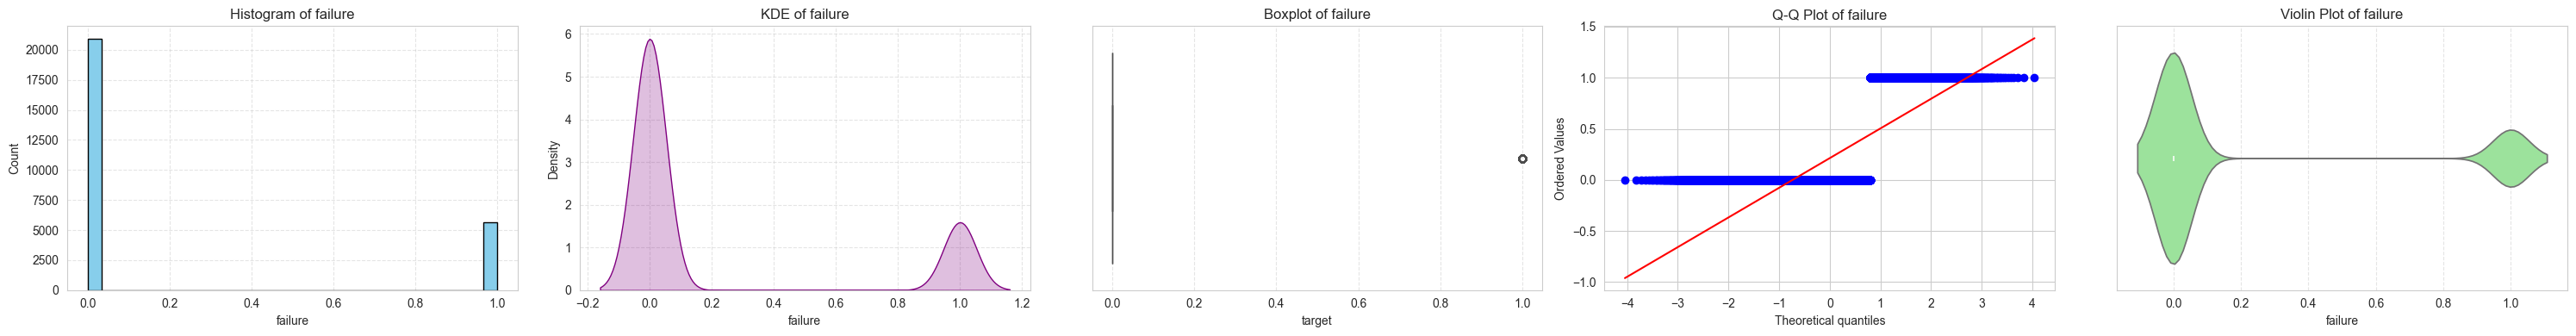

In [23]:
#负二项分布是一种离散、偏态的分布，高峰在左，右侧长尾巴
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

plt.figure(figsize=(30, 4))  # 调整图像宽度，适应5张子图

# 📊 1. 直方图
plt.subplot(1, 5, 1)
plt.hist(data['failure'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of failure')
plt.xlabel('failure')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.5)

# 📈 2. KDE 密度图
plt.subplot(1, 5, 2)
sns.kdeplot(data['failure'], fill=True, color='purple')
plt.title('KDE of failure')
plt.xlabel('failure')
plt.ylabel('Density')
plt.grid(True, linestyle='--', alpha=0.5)

# 📦 3. 箱线图
plt.subplot(1, 5, 3)
sns.boxplot(x=data['failure'], color='orange')
plt.title('Boxplot of failure')
plt.xlabel('target')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)

# 🔍 4. Q-Q 图
plt.subplot(1, 5, 4)
stats.probplot(data['failure'], dist="norm", plot=plt)
plt.title('Q-Q Plot of failure')

# 🎻 5. Violin Plot
plt.subplot(1, 5, 5)
sns.violinplot(x=data['failure'], color='lightgreen')
plt.title('Violin Plot of failure')
plt.xlabel('failure')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


In [24]:
#T分布是一种对称的连续概率分布，形状类似正态分布。与正态分布相比，尾部更厚（fatter tails）。通常用于 样本量较小（如 n < 30） 且总体标准差未知的情况，进行均值差异的假设检验（如 t-test）。
#数据来源:https://www.kaggle.com/code/youssifhassan/student-performance-eda-modelling/
data=pd.read_csv("student_data.csv")
data.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


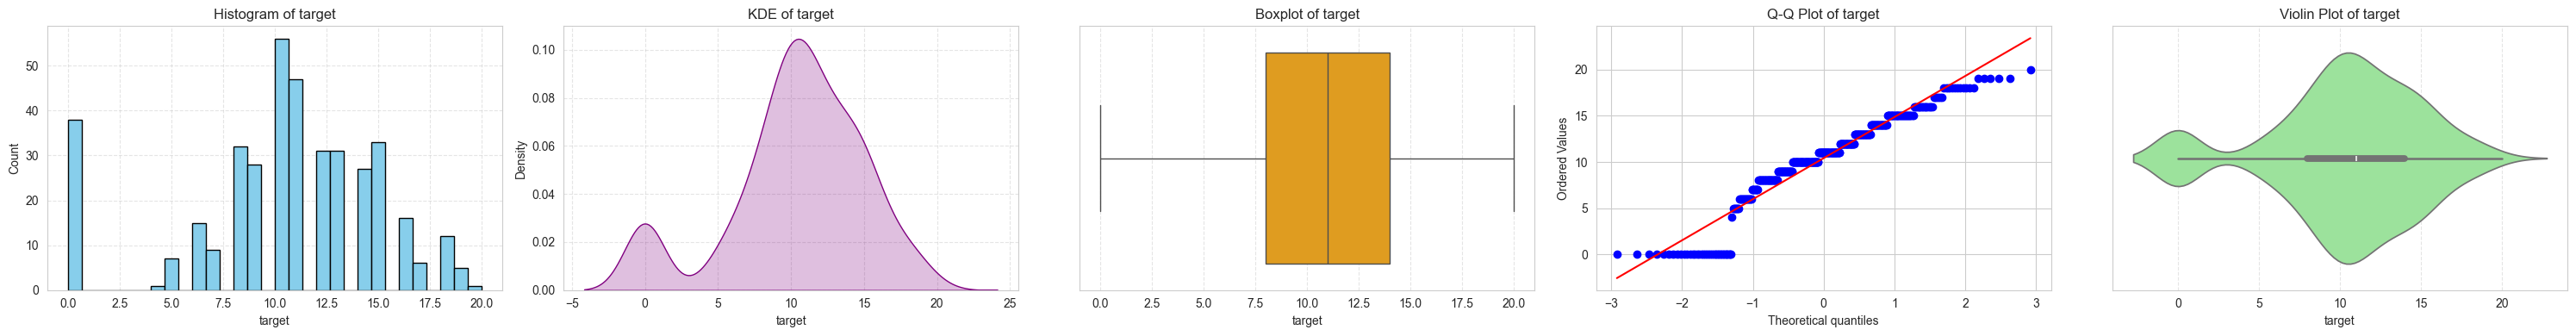

Target 均值: 10.42
Target 方差: 20.94


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

plt.figure(figsize=(30, 4))  # 调整图像宽度，适应5张子图

target=data['G3']
# 📊 1. 直方图
plt.subplot(1, 5, 1)
plt.hist(target, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of target')
plt.xlabel('target')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.5)

# 📈 2. KDE 密度图
plt.subplot(1, 5, 2)
sns.kdeplot(target, fill=True, color='purple')
plt.title('KDE of target')
plt.xlabel('target')
plt.ylabel('Density')
plt.grid(True, linestyle='--', alpha=0.5)

# 📦 3. 箱线图
plt.subplot(1, 5, 3)
sns.boxplot(x=target, color='orange')
plt.title('Boxplot of target')
plt.xlabel('target')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)

# 🔍 4. Q-Q 图
plt.subplot(1, 5, 4)
stats.probplot(target, dist="norm", plot=plt)
plt.title('Q-Q Plot of target')

# 🎻 5. Violin Plot
plt.subplot(1, 5, 5)
sns.violinplot(x=target, color='lightgreen')
plt.title('Violin Plot of target')
plt.xlabel('target')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()
# 计算均值和方差
mean_y = np.mean(target)
var_y = np.var(target)

print(f"Target 均值: {mean_y:.2f}")
print(f"Target 方差: {var_y:.2f}")

**数据预处理查看target数据是一件很重要的事情，关系到后续的模型选择。**